## (MBTI) Myers-Briggs Personality##

**The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis**

- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 



In [30]:
mbti = pd.read_csv('mbti_1.csv', encoding='latin-1')

In [31]:
mbti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


**A Sample of Data**

In [32]:
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [33]:
mbti.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'I second this idea, you could also add sleepi..."
freq,1832,1


**Next, we want to look at the data of how many MBTI types**

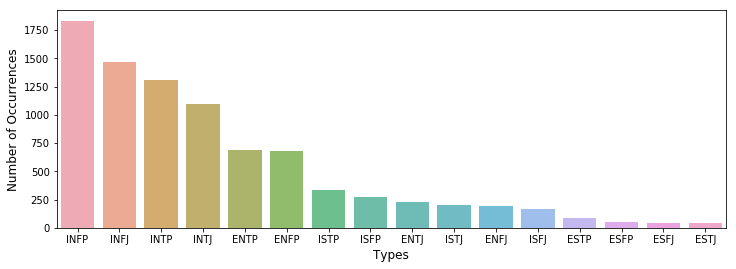

In [34]:
mbti_types = mbti['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(mbti_types.index, mbti_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

**Translate the MBTI type into binary values**

In [35]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

mbti = mbti.join(mbti.apply (lambda row: get_types (row),axis=1))
mbti.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


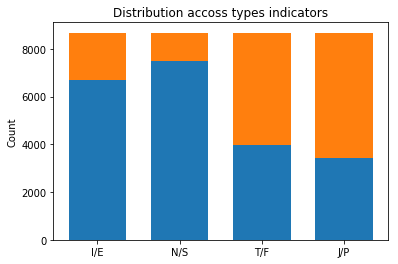

In [36]:
N = 4
but = (mbti['IE'].value_counts()[1], mbti['NS'].value_counts()[1], mbti['TF'].value_counts()[1], mbti['JP'].value_counts()[1])
top = (mbti['IE'].value_counts()[0], mbti['NS'].value_counts()[0], mbti['TF'].value_counts()[0], mbti['JP'].value_counts()[0])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

**Then, let's clean up the data**

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lillianphan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
# b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
# b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

# def translate_personality(personality):
#     # transform mbti to binary vector
    
#     return [b_Pers[l] for l in personality]

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

def pre_process(posts):
    temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
    temp = re.sub("[^a-zA-Z]", " ", temp)
    temp = re.sub(' +', ' ', temp).lower()
    temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
    
    return temp

def pre_process_data(data, remove_stop_words=True):

#     list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
#         type_labelized = translate_personality(row[1].type)
#         list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)

    return list_posts

**Vectorize with Tfidf**

In [41]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cntizer = CountVectorizer(analyzer="word",   
                             max_df=0.7,
                             min_df=0.1) 
X_cnt = cntizer.fit_transform(list_posts)
tfidf = TfidfVectorizer(preprocessor=pre_process)
X_tfidf = tfidf.fit_transform(X_cnt)
X_tfidf.shape

NameError: name 'list_posts' is not defined

In [12]:
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# bag = vectorizer.fit_transform(mbti_clean)
# # print(vectorizer.get_feature_names())
# # print(bag.toarray()) 
# tfidf = TfidfTransformer()
# X_tfidf =  tfidf.fit_transform(bag).toarray()




In [13]:
y = mbti[['type','IE', 'NS', 'TF', 'JP']]
X = mbti['posts']

In [14]:
y.head()

,type,IE,NS,TF,JP
0,INFJ,1,1,0,1
1,ENTP,0,1,1,0
2,INTP,1,1,1,0
3,INTJ,1,1,1,1
4,ENTJ,0,1,1,1


# Logistic Regression

Then, let's do a train test split, and train our model!

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

y_IE_train = y_train['IE']
y_NS_train = y_train['NS']
y_TF_train = y_train['TF']
y_JP_train = y_train['JP']

y_IE_test = y_test['IE']
y_NS_test = y_test['NS']
y_TF_test = y_test['TF']
y_JP_test = y_test['JP']

y_type_test = y_test['type']

In [16]:
def oversamling(data, y):
    n1 = len(y[y == 0])
    n2 = len(y[y == 1])
    temp_data = pd.concat ([y, data],axis = 1)
    if n1 > n2:
        majority_data = temp_data[y == 0]
        minority_data = temp_data[y == 1]
    else:
        majority_data = temp_data[y == 1]
        minority_data = temp_data[y == 0]
    over_sample_minority_data = minority_data.sample(len(majority_data), replace = True) # with replacement, since we take a larger sample than population
    over_sample_data = pd.concat ([over_sample_minority_data, majority_data], axis = 0)
    return over_sample_data.iloc[:,1], over_sample_data.iloc[:,0]

In [17]:
X_train_IE, y_train_IE = oversamling(X_train, y_IE_train)
X_train_NS, y_train_NS = oversamling(X_train, y_NS_train)
X_train_TF, y_train_TF = oversamling(X_train, y_TF_train)
X_train_JP, y_train_JP = oversamling(X_train, y_JP_train)

In [18]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# model_IE = LogisticRegression()
# model_NS = LogisticRegression()
# model_TF = LogisticRegression()
# model_JP = LogisticRegression()

model_IE = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression())])
model_NS = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression())])
model_TF = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression())])
model_JP = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression())])


model_IE.fit(X_train, y_IE_train)
model_NS.fit(X_train, y_NS_train)
model_TF.fit(X_train, y_TF_train)
model_JP.fit(X_train, y_JP_train)

CPU times: user 2min 27s, sys: 882 ms, total: 2min 28s
Wall time: 2min 27s


## Predictions and Evaluations

In [19]:
%%time

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluation_report(y_test, predictions):
    print('accuracy:',accuracy_score(y_test,predictions))
    print('confusion matrix:\n',confusion_matrix(y_test,predictions))
    print('classification report:\n',classification_report(y_test,predictions))

predictions_IE = model_IE.predict(X_test)
evaluation_report(y_IE_test, predictions_IE)

predictions_NS = model_NS.predict(X_test)
evaluation_report(y_NS_test, predictions_NS)

predictions_TF = model_TF.predict(X_test)
evaluation_report(y_TF_test, predictions_TF)

predictions_JP = model_IE.predict(X_test)
evaluation_report(y_JP_test, predictions_JP)


accuracy: 0.8242074927953891
confusion matrix:
 [[ 126  276]
 [  29 1304]]
classification report:
              precision    recall  f1-score   support

          0       0.81      0.31      0.45       402
          1       0.83      0.98      0.90      1333

avg / total       0.82      0.82      0.79      1735

accuracy: 0.8876080691642652
confusion matrix:
 [[  36  187]
 [   8 1504]]
classification report:
              precision    recall  f1-score   support

          0       0.82      0.16      0.27       223
          1       0.89      0.99      0.94      1512

avg / total       0.88      0.89      0.85      1735

accuracy: 0.8530259365994236
confusion matrix:
 [[797 114]
 [141 683]]
classification report:
              precision    recall  f1-score   support

          0       0.85      0.87      0.86       911
          1       0.86      0.83      0.84       824

avg / total       0.85      0.85      0.85      1735

accuracy: 0.4259365994236311
confusion matrix:
 [[112 953]
 [ 

In [20]:
# y_type_test
# predictions_IE, predictions_NS, predictions_TF, predictions_JP
# predictions = []
# for i in range(len(predictions_IE)):
#     s = 'I' if predictions_IE[i]==1 else 'E'
#     s += 'N' if predictions_NS[i]==1 else 'S'
#     s += 'T' if predictions_TF[i]==1 else 'F'
#     s += 'J' if predictions_JP[i]==1 else 'P'
#     predictions.append(s)
    
def back_to_type(a1, a2, a3, a4):
    s = 'I' if a1==1 else 'E'
    s += 'N' if a2==1 else 'S'
    s += 'T' if a3==1 else 'F'
    s += 'J' if a4==1 else 'P'
    return s

## Predict MBTI Type of worldwide-known man ...

In [27]:
trump_quotes = [
    'Sometimes by losing a battle you find a new way to win the war.',
    'No dream is too big. No challenge is too great. Nothing we want for our future is beyond our reach.',
    'You have to think anyway, so why not think big?',
    'When somebody challenges you, fight back. Be brutal, be tough.',
    'It is time to remember that old wisdom our soldiers will never forget: that whether we are black or brown or white, we all bleed the same red blood of patriots, we all enjoy the same glorious freedoms, and we all salute the same great American Flag.',
    'When you open your heart to patriotism, there is no room for prejudice. The Bible tells us', 
    'How good and pleasant it is when Gods people live together in unity.',
    'My whole life is about winning. I dont lose often. I almost never lose.',
    'I actually dont have a bad hairline.',
    'If she gets to pick her judges—nothing you can do, folks. Although, the Second Amendment people. Maybe there is. I don’t know.',
    'His wife, she was standing there, she had nothing to say. She probably— maybe she wasn’t allowed to have anything to say.',
    'When Iran, when they circle our beautiful destroyers with their little boats, and they make gestures at our people that they shouldn’t be allowed to make, they will be shot out of the water.',
    'Russia, if you’re listening, I hope you’re able to find the 30,000 emails that are missing. I think you will probably be rewarded mightily by our press.',
    'I will fight for you with every breath in my body – and I will never, ever let you down.'
    'It’s a great thing when you can show that you’ve been successful and that you’ve made a lot of money and that you’ve employed a lot of people.'
    'We will make America strong again. We will make America proud again. We will make America safe again. And we will make America great again.'
    'The problems we face now – poverty and violence at home, war and destruction abroad – will last only as long as we continue relying on the same politicians who created them in the first place'
    'Money was never a big motivation for me, except as a way to keep score. The real excitement is playing the game.'
    'Sometimes you need conflict in order to come up with a solution. Through weakness, oftentimes, you can’t make the right sort of settlement, so I’m aggressive, but I also get things done, and in the end, everybody likes me.'
    'I’ll drink water. Sometimes tomato juice, which I like. Sometimes orange juice, which I like. I’ll drink different things. But the Coke or Pepsi boosts you up a little.'
    'Part of being a winner is knowing when enough is enough. Sometimes you have to give up the fight and walk away, and move on to something that’s more productive'
    'You know the funny thing, I don’t get along with rich people. I get along with the middle class and the poor people better than I get along with the rich people.'
    'In the end, you’re measured not by how much you undertake but by what you finally accomplish'
    'A lot of people don’t like to win. They actually don’t know how to win, and they don’t like to win because down deep inside they don’t want to win'
    'We need a president with tremendous intelligence, smarts, cunning, strength and stamina.'
    'If you get good ratings, they’ll cover you even if you have nothing to say.'
    'I try to learn from the past, but I plan for the future by focusing exclusively on the present. That’s where the fun is'
    'Everything I do in life is framed through the view of a businessman. That’s my instinct. If I go into a pharmacy to buy shaving cream, then I’m going to look for the best deal on shaving cream'
    'I do respect them; I have great respect for women. In fact, one of the reasons ‘The Apprentice’ was such a successful show for so many years, the audience of women was fantastic'
    'I own buildings. I’m a builder; I know how to build. Nobody can build like I can build. Nobody. And the builders in New York will tell you that. I build the best product. And my name helps a lot'
    'Every day, I wake up determined to deliver a better life for the people all across this nation that have been neglected, ignored, and abandoned. I have visited the laid-off factory workers and the communities crushed by our horrible and unfair trade deals. These are the forgotten men and women of our country.'
    'The most basic duty of government is to defend the lives of its own citizens. Any government that fails to do so is a government unworthy to lead.'
    'My father was very energetic; my mother was very energetic. He lived to a very old age, and so did my mother. I believe that I just have it from my father, from my parents. They had wonderful energy'
    'We can’t let people down when they can’t get any medical care, when they’re sick and don’t have money to go to a doctor. You help them'
    'I always look at it that I work with my employees as opposed to them working for me.'
    'I’ve become very successful over the years. I think I own among the greatest properties in the world.'
    'Do not let anyone tell you it cannot be done. No challenge can match the heart and fight and spirit of America. We will not fail. Our country will thrive and prosper again'
    'My father was a successful real estate developer, and he was a very tough man but a good man. My father would always praise me. He always thought I was the smartest person'
    'America will start winning again, winning like never before'
    'I give to everybody. When they call, I give. And do you know what? When I need something from them two years later, three years later, I call them, they are there for me.'
    'I built a great company, one of the – some of the most iconic assets in the world, $10 billion of net worth, more than $10 billion of net worth, and frankly, I had a great time doing it.'
    'I’ve met some great people that deal with me in the press. I’ve also met some people that were very dishonorable, frankly.'
    'I think I was born with the drive for success because I have a certain gene'
    'People are tired of seeing politicians as all talk and no action.'
    'Owning a great golf course gives you great power.'
    'If you get good ratings, they’ll cover you even if you have nothing to say'
    'If people can just pour into the country illegally, you don’t have a country.'
    'Anyone who thinks my story is anywhere near over is sadly mistaken'
    'You know the funny thing, I don’t get along with rich people. I get along with the middle class and the poor people better than I get along with the rich people.'
    'Part of being a winner is knowing when enough is enough. Sometimes you have to give up the fight and walk away, and move on to something that’s more productive'
    'I’ll drink water. Sometimes tomato juice, which I like. Sometimes orange juice, which I like. I’ll drink different things. But the Coke or Pepsi boosts you up a little.'
    'Sometimes you need conflict in order to come up with a solution. Through weakness, oftentimes, you can’t make the right sort of settlement, so I’m aggressive, but I also get things done, and in the end, everybody likes me'
    'What separates the winners from the losers is how a person reacts to each new twist of fate.'
    'The problems we face now – poverty and violence at home, war and destruction abroad – will last only as long as we continue relying on the same politicians who created them in the first place.'
    'People love me. And you know what, I have been very successful. Everybody loves me'
    'We must speak our minds openly, debate our disagreements honestly, but always pursue solidarity.'
    'When somebody challenges you, fight back. Be brutal, be tough.'
    'I will fight for you with every breath in my body – and I will never, ever let you down'
    'I’m competitive, and I love to create challenges for myself. Maybe that’s not always a good thing. It can make life complicated.'
    'Without passion you don’t have energy, with out energy you have nothing'
]
trump_post = ' '.join(trump_quotes)

# sample = tfidf.fit_transform([pre_process(trump_post)])
print( model_IE.predict([trump_post]), 
        model_NS.predict([trump_post]),
        model_TF.predict([trump_post]),
        model_JP.predict([trump_post]))
print( back_to_type(model_IE.predict([trump_post]), 
        model_NS.predict([trump_post]),
        model_TF.predict([trump_post]),
        model_JP.predict([trump_post])))

[1] [1] [1] [0]
INTP


The correct type is **ESTP**

## Reference

https://careerassessmentsite.com/celebrity-personality-types/mbti-estp/
https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator